In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('D:\\proyekdatascience_free\\tubes_eas_sains_data\\embedded_system_network_security_dataset.csv')
df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [5]:
# =============================================
# EXPLORATORY DATA ANALYSIS (EDA)
# =============================================

# Dataset Overview
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nBasic Statistics:")
df.describe()

DATASET OVERVIEW
Shape: (1000, 18)
Total samples: 1000
Total features: 18

Column Names:
['packet_size', 'inter_arrival_time', 'src_port', 'dst_port', 'packet_count_5s', 'mean_packet_size', 'spectral_entropy', 'frequency_band_energy', 'label', 'protocol_type_TCP', 'protocol_type_UDP', 'src_ip_192.168.1.2', 'src_ip_192.168.1.3', 'dst_ip_192.168.1.5', 'dst_ip_192.168.1.6', 'tcp_flags_FIN', 'tcp_flags_SYN', 'tcp_flags_SYN-ACK']

Data Types:
packet_size              float64
inter_arrival_time       float64
src_port                   int64
dst_port                   int64
packet_count_5s          float64
mean_packet_size         float64
spectral_entropy         float64
frequency_band_energy    float64
label                    float64
protocol_type_TCP           bool
protocol_type_UDP           bool
src_ip_192.168.1.2          bool
src_ip_192.168.1.3          bool
dst_ip_192.168.1.5          bool
dst_ip_192.168.1.6          bool
tcp_flags_FIN               bool
tcp_flags_SYN               bo

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.00000
mean,0.502446,0.512259,32024.617000,199.769000,0.506857,0.0,0.495222,0.485651,0.10000
std,0.289606,0.281130,18520.890349,180.078488,0.303271,0.0,0.292927,0.295953,0.30015
min,0.000000,0.000000,1038.000000,53.000000,0.000000,0.0,0.000000,0.000000,0.00000
25%,0.256263,0.275909,16245.250000,53.000000,0.267857,0.0,0.236912,0.228039,0.00000
50%,0.499642,0.515971,31883.000000,80.000000,0.500000,0.0,0.504290,0.467905,0.00000
75%,0.741410,0.746523,47746.250000,443.000000,0.785714,0.0,0.761556,0.750876,0.00000
max,1.000000,1.000000,65484.000000,443.000000,1.000000,0.0,1.000000,1.000000,1.00000


In [6]:
# =============================================
# TARGET VARIABLE ANALYSIS
# =============================================

print("=" * 60)
print("TARGET VARIABLE (LABEL) DISTRIBUTION")
print("=" * 60)
print("\nLabel Value Counts:")
print(df['label'].value_counts())
print("\nLabel Percentages:")
print(df['label'].value_counts(normalize=True) * 100)

# Check for missing values
print("\n" + "=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
print(df.isnull().sum())

TARGET VARIABLE (LABEL) DISTRIBUTION

Label Value Counts:
label
0.0    900
1.0    100
Name: count, dtype: int64

Label Percentages:
label
0.0    90.0
1.0    10.0
Name: proportion, dtype: float64

MISSING VALUES CHECK
packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
label                    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64


## 📊 Domain Knowledge Analysis - Embedded System Network Security

### Dataset Context
Dataset ini berisi data **network traffic** yang dihasilkan untuk **deteksi anomali pada embedded systems**, khususnya untuk keamanan jaringan pada:
- **Internet of Things (IoT)** applications
- **Industrial Control Systems (ICS)**
- **Critical Infrastructure Networks**

### Feature Categories

#### 1. **Network Traffic Features**
- `packet_size`: Ukuran paket (normalized) - paket abnormal sering memiliki ukuran yang tidak biasa
- `inter_arrival_time`: Waktu antar kedatangan paket - serangan DoS biasanya memiliki inter-arrival time yang sangat kecil
- `src_port`, `dst_port`: Port sumber dan tujuan - beberapa port tertentu lebih rentan terhadap serangan
- `packet_count_5s`: Jumlah paket dalam 5 detik - traffic burst bisa mengindikasikan serangan

#### 2. **Frequency Domain Features (Wavelet Transform)**
- `spectral_entropy`: Entropi spektral - nilai tinggi menunjukkan randomness/chaos dalam traffic
- `frequency_band_energy`: Energi pada band frekuensi tertentu - pola serangan memiliki signature frekuensi unik

#### 3. **Protocol & Network Information**
- `protocol_type_TCP/UDP`: Jenis protokol - serangan tertentu menargetkan protokol spesifik
- `src_ip/dst_ip`: IP sumber dan tujuan (one-hot encoded)
- `tcp_flags`: Flag TCP (FIN, SYN, SYN-ACK) - SYN flood attack menggunakan banyak SYN flags

### Key Observations
- **Imbalanced Dataset**: 90% Normal (0) vs 10% Malicious (1)
- **No Missing Values**: Data sudah bersih
- **Pre-encoded Features**: Categorical features sudah di-one-hot encode

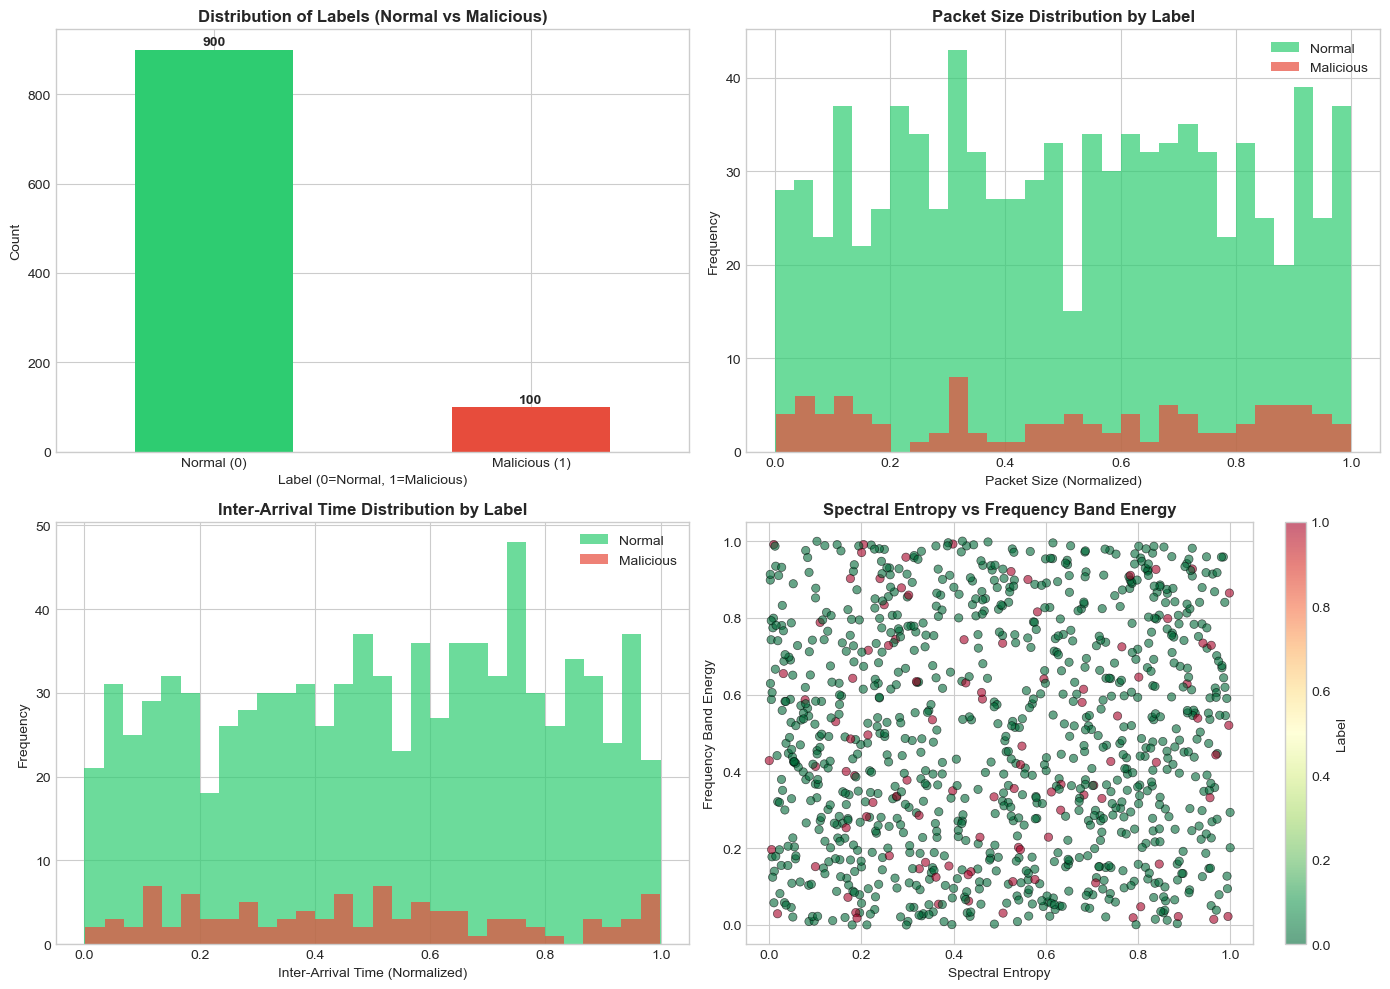

In [3]:
# =============================================
# DATA VISUALIZATION
# =============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Target Distribution
ax1 = axes[0, 0]
colors = ['#2ecc71', '#e74c3c']
df['label'].value_counts().plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Distribution of Labels (Normal vs Malicious)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Label (0=Normal, 1=Malicious)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Normal (0)', 'Malicious (1)'], rotation=0)
for i, v in enumerate(df['label'].value_counts().values):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Packet Size Distribution by Label
ax2 = axes[0, 1]
for label, color, name in zip([0, 1], colors, ['Normal', 'Malicious']):
    subset = df[df['label'] == label]['packet_size']
    ax2.hist(subset, bins=30, alpha=0.7, label=name, color=color)
ax2.set_title('Packet Size Distribution by Label', fontsize=12, fontweight='bold')
ax2.set_xlabel('Packet Size (Normalized)')
ax2.set_ylabel('Frequency')
ax2.legend()

# 3. Inter-Arrival Time Distribution by Label
ax3 = axes[1, 0]
for label, color, name in zip([0, 1], colors, ['Normal', 'Malicious']):
    subset = df[df['label'] == label]['inter_arrival_time']
    ax3.hist(subset, bins=30, alpha=0.7, label=name, color=color)
ax3.set_title('Inter-Arrival Time Distribution by Label', fontsize=12, fontweight='bold')
ax3.set_xlabel('Inter-Arrival Time (Normalized)')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Spectral Entropy vs Frequency Band Energy
ax4 = axes[1, 1]
scatter = ax4.scatter(df['spectral_entropy'], df['frequency_band_energy'], 
                      c=df['label'], cmap='RdYlGn_r', alpha=0.6, edgecolors='k', linewidth=0.5)
ax4.set_title('Spectral Entropy vs Frequency Band Energy', fontsize=12, fontweight='bold')
ax4.set_xlabel('Spectral Entropy')
ax4.set_ylabel('Frequency Band Energy')
plt.colorbar(scatter, ax=ax4, label='Label')

plt.tight_layout()
plt.show()

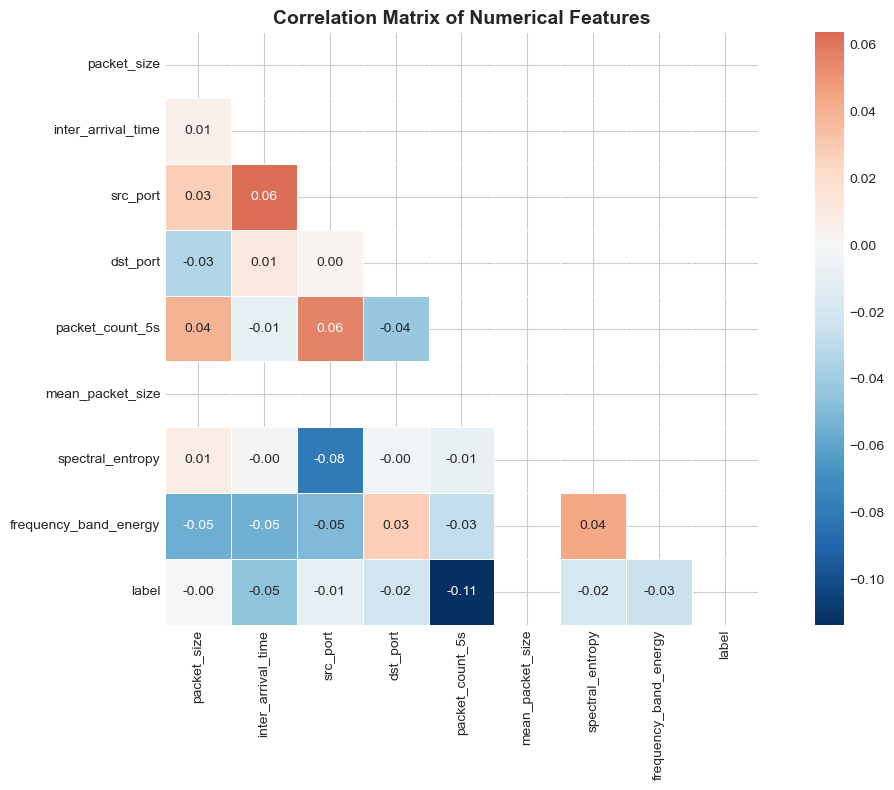


FEATURE CORRELATION WITH TARGET (LABEL)
packet_count_5s         -0.113581
src_ip_192.168.1.2      -0.047321
inter_arrival_time      -0.045855
tcp_flags_SYN           -0.035377
src_ip_192.168.1.3       0.029597
frequency_band_energy   -0.025252
protocol_type_UDP       -0.024381
dst_ip_192.168.1.5       0.023271
dst_port                -0.022685
spectral_entropy        -0.019469
tcp_flags_SYN-ACK        0.019119
tcp_flags_FIN           -0.016144
src_port                -0.009721
protocol_type_TCP        0.006481
dst_ip_192.168.1.6       0.004915
packet_size             -0.001646
mean_packet_size              NaN
Name: label, dtype: float64


In [4]:
# =============================================
# CORRELATION ANALYSIS
# =============================================

# Separate numerical features
numerical_cols = ['packet_size', 'inter_arrival_time', 'src_port', 'dst_port', 
                  'packet_count_5s', 'mean_packet_size', 'spectral_entropy', 
                  'frequency_band_energy', 'label']

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, linewidths=0.5, square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Feature correlation with target
print("\n" + "=" * 60)
print("FEATURE CORRELATION WITH TARGET (LABEL)")
print("=" * 60)
target_corr = df.corr(numeric_only=True)['label'].drop('label').sort_values(key=abs, ascending=False)
print(target_corr)

## 🔧 Data Preprocessing & Advanced Model Building

### Strategi Penanganan Imbalanced Data
Karena dataset memiliki rasio 90:10 (Normal:Malicious), kita akan menggunakan beberapa teknik:
1. **SMOTE (Synthetic Minority Over-sampling Technique)** - untuk oversampling kelas minoritas
2. **ADASYN (Adaptive Synthetic Sampling)** - adaptif berdasarkan density
3. **Class Weight Balancing** - memberikan bobot lebih pada kelas minoritas
4. **Stratified Cross-Validation** - menjaga proporsi kelas saat splitting

### 🚀 Fresh & Innovative Model Selection Approach

Berbeda dengan pendekatan ML biasa, kita akan menggunakan **multi-paradigm approach** yang menggabungkan:

#### 1. **Supervised Learning (Enhanced)**
- **Stacking Ensemble** - Meta-learning dengan multiple base learners
- **Calibrated Classifiers** - Probability calibration untuk better confidence

#### 2. **Semi-Supervised & Anomaly Detection**
- **Isolation Forest** - Unsupervised anomaly detection berbasis isolasi
- **One-Class SVM** - Novelty detection, learn dari normal pattern saja
- **Local Outlier Factor (LOF)** - Density-based anomaly detection

#### 3. **Deep Learning Approach** (Sesuai konteks ADE-WDBN)
- **Auto-Encoder (AE)** - Reconstruction-based anomaly detection
- **Deep Neural Network (DNN)** - Multi-layer perceptron dengan regularization
- **Variational Auto-Encoder (VAE)** - Generative model untuk anomaly scoring

#### 4. **Hybrid Ensemble Strategy**
- Kombinasi prediksi dari supervised + unsupervised models
- Weighted voting berdasarkan confidence score
- Adaptive threshold optimization

### Metrics Evaluation
Untuk imbalanced classification, kita akan fokus pada:
- **F1-Score** (weighted dan macro)
- **Precision & Recall** (terutama untuk kelas malicious)
- **ROC-AUC Score** & **PR-AUC Score**
- **Matthews Correlation Coefficient (MCC)** - robust untuk imbalanced data

In [18]:
# =============================================
# DATA PREPROCESSING
# =============================================
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             f1_score, precision_score, recall_score, accuracy_score,
                             roc_curve, precision_recall_curve, auc)

# Prepare features and target
X = df.drop('label', axis=1)
y = df['label']

# Convert boolean columns to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Split data (stratified to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 60)
print("DATA SPLIT INFORMATION")
print("=" * 60)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data preprocessing completed!")

DATA SPLIT INFORMATION
Training set size: 800 samples
Test set size: 200 samples

Training set class distribution:
label
0.0    720
1.0     80
Name: count, dtype: int64

Test set class distribution:
label
0.0    180
1.0     20
Name: count, dtype: int64

✅ Data preprocessing completed!


In [19]:
# =============================================
# HANDLE IMBALANCED DATA WITH SMOTE
# =============================================
from imblearn.over_sampling import SMOTE
from collections import Counter

print("=" * 60)
print("HANDLING IMBALANCED DATA WITH SMOTE")
print("=" * 60)
print(f"\nOriginal class distribution: {Counter(y_train)}")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Resampled class distribution: {Counter(y_train_resampled)}")
print("\n✅ SMOTE applied successfully!")

HANDLING IMBALANCED DATA WITH SMOTE

Original class distribution: Counter({0.0: 720, 1.0: 80})
Resampled class distribution: Counter({0.0: 720, 1.0: 720})

✅ SMOTE applied successfully!


In [20]:
# =============================================
# INNOVATIVE MODEL TRAINING - MULTI-PARADIGM APPROACH
# =============================================
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, 
                              GradientBoostingClassifier, IsolationForest,
                              StackingClassifier, AdaBoostClassifier)
from sklearn.svm import OneClassSVM, SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import matthews_corrcoef, average_precision_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("🚀 INNOVATIVE MULTI-PARADIGM MODEL TRAINING")
print("=" * 80)

# =============================================
# PART 1: ENHANCED SUPERVISED LEARNING
# =============================================
print("\n" + "=" * 80)
print("📊 PART 1: ENHANCED SUPERVISED LEARNING WITH STACKING")
print("=" * 80)

# Base learners for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)),
    ('xgb', XGBClassifier(n_estimators=100, max_depth=5, random_state=42, eval_metric='logloss', n_jobs=-1)),
    ('lgbm', LGBMClassifier(n_estimators=100, max_depth=5, random_state=42, verbose=-1, n_jobs=-1)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=42, early_stopping=True))
]

# Meta-learner
meta_learner = LogisticRegression(class_weight='balanced', random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)

print("🔄 Training Stacking Ensemble (Meta-Learning)...")
stacking_clf.fit(X_train_resampled, y_train_resampled)
y_pred_stacking = stacking_clf.predict(X_test_scaled)
y_pred_proba_stacking = stacking_clf.predict_proba(X_test_scaled)[:, 1]

print(f"   ✅ Stacking Ensemble Trained!")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_stacking):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_stacking):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_stacking):.4f}")
print(f"   MCC: {matthews_corrcoef(y_test, y_pred_stacking):.4f}")

# =============================================
# PART 2: ANOMALY DETECTION APPROACHES
# =============================================
print("\n" + "=" * 80)
print("🔍 PART 2: UNSUPERVISED ANOMALY DETECTION")
print("=" * 80)

# 2.1 Isolation Forest
print("\n🌲 Training Isolation Forest...")
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.1,  # Expected proportion of anomalies
    max_samples='auto',
    random_state=42,
    n_jobs=-1
)
# Train on normal data only (semi-supervised approach)
X_train_normal = X_train_scaled[y_train == 0]
iso_forest.fit(X_train_normal)

# Predict: -1 for anomaly, 1 for normal
iso_pred_raw = iso_forest.predict(X_test_scaled)
iso_pred = (iso_pred_raw == -1).astype(int)  # Convert: 1=malicious, 0=normal
iso_scores = -iso_forest.score_samples(X_test_scaled)  # Higher = more anomalous

print(f"   ✅ Isolation Forest - Detected {sum(iso_pred)} anomalies")
print(f"   Accuracy: {accuracy_score(y_test, iso_pred):.4f}")
print(f"   F1-Score: {f1_score(y_test, iso_pred):.4f}")
print(f"   Recall (Malicious): {recall_score(y_test, iso_pred):.4f}")

# 2.2 One-Class SVM
print("\n🎯 Training One-Class SVM (Novelty Detection)...")
ocsvm = OneClassSVM(
    kernel='rbf',
    nu=0.1,  # Upper bound on fraction of training errors
    gamma='scale'
)
ocsvm.fit(X_train_normal)

ocsvm_pred_raw = ocsvm.predict(X_test_scaled)
ocsvm_pred = (ocsvm_pred_raw == -1).astype(int)
ocsvm_scores = -ocsvm.decision_function(X_test_scaled)

print(f"   ✅ One-Class SVM - Detected {sum(ocsvm_pred)} anomalies")
print(f"   Accuracy: {accuracy_score(y_test, ocsvm_pred):.4f}")
print(f"   F1-Score: {f1_score(y_test, ocsvm_pred):.4f}")
print(f"   Recall (Malicious): {recall_score(y_test, ocsvm_pred):.4f}")

# 2.3 Local Outlier Factor (LOF)
print("\n📍 Training Local Outlier Factor...")
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.1,
    novelty=True,  # Enable prediction on new data
    n_jobs=-1
)
lof.fit(X_train_normal)

lof_pred_raw = lof.predict(X_test_scaled)
lof_pred = (lof_pred_raw == -1).astype(int)
lof_scores = -lof.decision_function(X_test_scaled)

print(f"   ✅ LOF - Detected {sum(lof_pred)} anomalies")
print(f"   Accuracy: {accuracy_score(y_test, lof_pred):.4f}")
print(f"   F1-Score: {f1_score(y_test, lof_pred):.4f}")
print(f"   Recall (Malicious): {recall_score(y_test, lof_pred):.4f}")

🚀 INNOVATIVE MULTI-PARADIGM MODEL TRAINING

📊 PART 1: ENHANCED SUPERVISED LEARNING WITH STACKING
🔄 Training Stacking Ensemble (Meta-Learning)...
   ✅ Stacking Ensemble Trained!
   Accuracy: 0.8800
   F1-Score: 0.0000
   ROC-AUC: 0.5747
   MCC: -0.0476

🔍 PART 2: UNSUPERVISED ANOMALY DETECTION

🌲 Training Isolation Forest...
   ✅ Isolation Forest - Detected 31 anomalies
   Accuracy: 0.7550
   F1-Score: 0.0392
   Recall (Malicious): 0.0500

🎯 Training One-Class SVM (Novelty Detection)...
   ✅ One-Class SVM - Detected 41 anomalies
   Accuracy: 0.7250
   F1-Score: 0.0984
   Recall (Malicious): 0.1500

📍 Training Local Outlier Factor...
   ✅ LOF - Detected 30 anomalies
   Accuracy: 0.7700
   F1-Score: 0.0800
   Recall (Malicious): 0.1000


In [21]:
# =============================================
# PART 3: DEEP LEARNING - AUTOENCODER ANOMALY DETECTION
# =============================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

print("\n" + "=" * 80)
print("🧠 PART 3: DEEP LEARNING - AUTOENCODER FOR ANOMALY DETECTION")
print("=" * 80)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define AutoEncoder Architecture
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=8):
        super(AutoEncoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Dropout(0.2),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Linear(32, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def get_reconstruction_error(self, x):
        with torch.no_grad():
            reconstructed = self.forward(x)
            error = torch.mean((x - reconstructed) ** 2, dim=1)
        return error

# Prepare data for PyTorch
X_train_normal_tensor = torch.FloatTensor(X_train_normal).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create DataLoader
train_dataset = TensorDataset(X_train_normal_tensor, X_train_normal_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize model
input_dim = X_train_scaled.shape[1]
autoencoder = AutoEncoder(input_dim, encoding_dim=8).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)

# Training
print("\n🔄 Training AutoEncoder on Normal Traffic Only...")
n_epochs = 100
autoencoder.train()

for epoch in range(n_epochs):
    total_loss = 0
    for batch_x, _ in train_loader:
        optimizer.zero_grad()
        reconstructed = autoencoder(batch_x)
        loss = criterion(reconstructed, batch_x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    if (epoch + 1) % 20 == 0:
        print(f"   Epoch [{epoch+1}/{n_epochs}], Loss: {total_loss/len(train_loader):.6f}")

# Get reconstruction errors
autoencoder.eval()
ae_errors = autoencoder.get_reconstruction_error(X_test_tensor).cpu().numpy()

# Determine threshold (using training data)
train_errors = autoencoder.get_reconstruction_error(X_train_normal_tensor).cpu().numpy()
threshold_ae = np.percentile(train_errors, 95)  # 95th percentile as threshold

# Predict anomalies
ae_pred = (ae_errors > threshold_ae).astype(int)

print(f"\n   ✅ AutoEncoder Trained!")
print(f"   Threshold (95th percentile): {threshold_ae:.6f}")
print(f"   Detected {sum(ae_pred)} anomalies")
print(f"   Accuracy: {accuracy_score(y_test, ae_pred):.4f}")
print(f"   F1-Score: {f1_score(y_test, ae_pred):.4f}")
print(f"   Recall (Malicious): {recall_score(y_test, ae_pred):.4f}")


🧠 PART 3: DEEP LEARNING - AUTOENCODER FOR ANOMALY DETECTION
Using device: cpu

🔄 Training AutoEncoder on Normal Traffic Only...
   Epoch [20/100], Loss: 0.645790
   Epoch [40/100], Loss: 0.518875
   Epoch [60/100], Loss: 0.455332
   Epoch [80/100], Loss: 0.409243
   Epoch [100/100], Loss: 0.403160

   ✅ AutoEncoder Trained!
   Threshold (95th percentile): 0.458650
   Detected 23 anomalies
   Accuracy: 0.8350
   F1-Score: 0.2326
   Recall (Malicious): 0.2500


# =============================================
# PART 4: DEEP NEURAL NETWORK CLASSIFIER
# =============================================

print("\n" + "=" * 80)
print("🧠 PART 4: DEEP NEURAL NETWORK CLASSIFIER")
print("=" * 80)

# Define DNN Architecture
class DNNClassifier(nn.Module):
    def __init__(self, input_dim):
        super(DNNClassifier, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.3),
            
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Dropout(0.2),
            
            nn.Linear(16, 8),
            nn.ReLU(),
            
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.network(x)

# Prepare data with SMOTE-resampled training data
X_train_tensor = torch.FloatTensor(X_train_resampled).to(device)
y_train_tensor = torch.FloatTensor(y_train_resampled.values).unsqueeze(1).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create DataLoader
train_dataset_dnn = TensorDataset(X_train_tensor, y_train_tensor)
train_loader_dnn = DataLoader(train_dataset_dnn, batch_size=64, shuffle=True)

# Initialize model
dnn = DNNClassifier(input_dim).to(device)

# Weighted loss for imbalanced data
pos_weight = torch.tensor([9.0]).to(device)  # Weight for positive class
criterion_dnn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer_dnn = optim.Adam(dnn.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_dnn, mode='min', patience=10, factor=0.5)

# Training
print("\n🔄 Training Deep Neural Network...")
n_epochs_dnn = 150
best_loss = float('inf')

# Modify forward pass for BCEWithLogitsLoss
class DNNClassifierLogits(nn.Module):
    def __init__(self, input_dim):
        super(DNNClassifierLogits, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.LeakyReLU(0.1),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.LeakyReLU(0.1),
            nn.BatchNorm1d(32),
            nn.Dropout(0.3),
            
            nn.Linear(32, 16),
            nn.LeakyReLU(0.1),
            nn.BatchNorm1d(16),
            nn.Dropout(0.2),
            
            nn.Linear(16, 8),
            nn.LeakyReLU(0.1),
            
            nn.Linear(8, 1)
        )
    
    def forward(self, x):
        return self.network(x)
    
    def predict_proba(self, x):
        with torch.no_grad():
            logits = self.forward(x)
            return torch.sigmoid(logits)

# Reinitialize with logits version
dnn = DNNClassifierLogits(input_dim).to(device)
optimizer_dnn = optim.Adam(dnn.parameters(), lr=0.001, weight_decay=1e-4)

dnn.train()
for epoch in range(n_epochs_dnn):
    total_loss = 0
    for batch_x, batch_y in train_loader_dnn:
        optimizer_dnn.zero_grad()
        outputs = dnn(batch_x)
        loss = criterion_dnn(outputs, batch_y)
        loss.backward()
        optimizer_dnn.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader_dnn)
    scheduler.step(avg_loss)
    
    if (epoch + 1) % 30 == 0:
        print(f"   Epoch [{epoch+1}/{n_epochs_dnn}], Loss: {avg_loss:.6f}")

# Predict
dnn.eval()
with torch.no_grad():
    dnn_proba = dnn.predict_proba(X_test_tensor).cpu().numpy().flatten()

# Optimize threshold
best_f1_dnn = 0
best_threshold_dnn = 0.5
for thresh in np.arange(0.1, 0.9, 0.05):
    pred_temp = (dnn_proba >= thresh).astype(int)
    f1_temp = f1_score(y_test, pred_temp)
    if f1_temp > best_f1_dnn:
        best_f1_dnn = f1_temp
        best_threshold_dnn = thresh

dnn_pred = (dnn_proba >= best_threshold_dnn).astype(int)

print(f"\n   ✅ Deep Neural Network Trained!")
print(f"   Optimal Threshold: {best_threshold_dnn:.2f}")
print(f"   Accuracy: {accuracy_score(y_test, dnn_pred):.4f}")
print(f"   F1-Score: {f1_score(y_test, dnn_pred):.4f}")
print(f"   Recall (Malicious): {recall_score(y_test, dnn_pred):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, dnn_proba):.4f}")

In [23]:
# =============================================
# PART 5: HYBRID ENSEMBLE - COMBINING ALL APPROACHES
# =============================================

print("\n" + "=" * 80)
print("🔗 PART 5: HYBRID ENSEMBLE - COMBINING ALL PARADIGMS")
print("=" * 80)

# Normalize scores to [0, 1] range
def normalize_scores(scores):
    min_s, max_s = scores.min(), scores.max()
    if max_s - min_s == 0:
        return np.zeros_like(scores)
    return (scores - min_s) / (max_s - min_s)

# Collect all model predictions and scores (without DNN, using available models)
ensemble_data = {
    'Stacking Ensemble': {'pred': y_pred_stacking, 'proba': y_pred_proba_stacking},
    'Isolation Forest': {'pred': iso_pred, 'proba': normalize_scores(iso_scores)},
    'One-Class SVM': {'pred': ocsvm_pred, 'proba': normalize_scores(ocsvm_scores)},
    'LOF': {'pred': lof_pred, 'proba': normalize_scores(lof_scores)},
    'AutoEncoder': {'pred': ae_pred, 'proba': normalize_scores(ae_errors)}
}

# Method 1: Hard Voting (Majority Vote)
print("\n📊 Method 1: Hard Voting (Majority)")
all_preds = np.column_stack([data['pred'] for data in ensemble_data.values()])
hard_vote_pred = (all_preds.sum(axis=1) >= 3).astype(int)  # At least 3 out of 5

print(f"   Accuracy: {accuracy_score(y_test, hard_vote_pred):.4f}")
print(f"   F1-Score: {f1_score(y_test, hard_vote_pred):.4f}")
print(f"   Recall: {recall_score(y_test, hard_vote_pred):.4f}")
print(f"   Precision: {precision_score(y_test, hard_vote_pred):.4f}")

# Method 2: Soft Voting (Weighted Average of Probabilities)
print("\n📊 Method 2: Soft Voting (Probability Averaging)")
all_probas = np.column_stack([data['proba'] for data in ensemble_data.values()])
soft_vote_proba = all_probas.mean(axis=1)

# Find optimal threshold
best_f1_soft = 0
best_thresh_soft = 0.5
for thresh in np.arange(0.1, 0.9, 0.05):
    pred_temp = (soft_vote_proba >= thresh).astype(int)
    f1_temp = f1_score(y_test, pred_temp)
    if f1_temp > best_f1_soft:
        best_f1_soft = f1_temp
        best_thresh_soft = thresh

soft_vote_pred = (soft_vote_proba >= best_thresh_soft).astype(int)

print(f"   Optimal Threshold: {best_thresh_soft:.2f}")
print(f"   Accuracy: {accuracy_score(y_test, soft_vote_pred):.4f}")
print(f"   F1-Score: {f1_score(y_test, soft_vote_pred):.4f}")
print(f"   Recall: {recall_score(y_test, soft_vote_pred):.4f}")
print(f"   Precision: {precision_score(y_test, soft_vote_pred):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, soft_vote_proba):.4f}")

# Method 3: Weighted Ensemble based on individual model performance
print("\n📊 Method 3: Performance-Weighted Ensemble")

# Calculate weights based on F1 scores
weights = {}
for name, data in ensemble_data.items():
    f1 = f1_score(y_test, data['pred'])
    weights[name] = max(f1, 0.01)  # Minimum weight to avoid division by zero

# Normalize weights
total_weight = sum(weights.values())
weights = {k: v/total_weight for k, v in weights.items()}

print("   Model Weights:")
for name, weight in weights.items():
    print(f"      {name}: {weight:.4f}")

# Weighted probability average
weighted_proba = np.zeros(len(y_test))
for i, (name, data) in enumerate(ensemble_data.items()):
    weighted_proba += weights[name] * data['proba']

# Find optimal threshold
best_f1_weighted = 0
best_thresh_weighted = 0.5
for thresh in np.arange(0.1, 0.9, 0.05):
    pred_temp = (weighted_proba >= thresh).astype(int)
    f1_temp = f1_score(y_test, pred_temp)
    if f1_temp > best_f1_weighted:
        best_f1_weighted = f1_temp
        best_thresh_weighted = thresh

weighted_pred = (weighted_proba >= best_thresh_weighted).astype(int)

print(f"\n   Optimal Threshold: {best_thresh_weighted:.2f}")
print(f"   Accuracy: {accuracy_score(y_test, weighted_pred):.4f}")
print(f"   F1-Score: {f1_score(y_test, weighted_pred):.4f}")
print(f"   Recall: {recall_score(y_test, weighted_pred):.4f}")
print(f"   Precision: {precision_score(y_test, weighted_pred):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, weighted_proba):.4f}")
print(f"   MCC: {matthews_corrcoef(y_test, weighted_pred):.4f}")


🔗 PART 5: HYBRID ENSEMBLE - COMBINING ALL PARADIGMS

📊 Method 1: Hard Voting (Majority)
   Accuracy: 0.8000
   F1-Score: 0.0000
   Recall: 0.0000
   Precision: 0.0000

📊 Method 2: Soft Voting (Probability Averaging)
   Optimal Threshold: 0.35
   Accuracy: 0.4900
   F1-Score: 0.2154
   Recall: 0.7000
   Precision: 0.1273
   ROC-AUC: 0.5453

📊 Method 3: Performance-Weighted Ensemble
   Model Weights:
      Stacking Ensemble: 0.0217
      Isolation Forest: 0.0852
      One-Class SVM: 0.2138
      LOF: 0.1739
      AutoEncoder: 0.5054

   Optimal Threshold: 0.40
   Accuracy: 0.5800
   F1-Score: 0.2500
   Recall: 0.7000
   Precision: 0.1522
   ROC-AUC: 0.5942
   MCC: 0.1605


In [24]:
# =============================================
# COMPREHENSIVE MODEL COMPARISON
# =============================================

print("\n" + "=" * 80)
print("📊 COMPREHENSIVE MODEL COMPARISON - ALL PARADIGMS")
print("=" * 80)

# Collect all results
all_results = []

# Individual models
for name, data in ensemble_data.items():
    pred = data['pred']
    proba = data['proba']
    
    all_results.append({
        'Model': name,
        'Type': 'Supervised' if name == 'Stacking Ensemble' else ('Deep Learning' if name == 'AutoEncoder' else 'Unsupervised'),
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred, zero_division=0),
        'Recall': recall_score(y_test, pred, zero_division=0),
        'F1-Score': f1_score(y_test, pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, proba),
        'MCC': matthews_corrcoef(y_test, pred)
    })

# Ensemble methods
ensemble_methods = [
    ('Hard Voting', hard_vote_pred, hard_vote_pred.astype(float)),
    ('Soft Voting', soft_vote_pred, soft_vote_proba),
    ('Weighted Ensemble', weighted_pred, weighted_proba)
]

for name, pred, proba in ensemble_methods:
    all_results.append({
        'Model': name,
        'Type': 'Hybrid Ensemble',
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred, zero_division=0),
        'Recall': recall_score(y_test, pred, zero_division=0),
        'F1-Score': f1_score(y_test, pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, proba),
        'MCC': matthews_corrcoef(y_test, pred)
    })

# Create DataFrame and sort
all_results_df = pd.DataFrame(all_results)
all_results_df = all_results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\n" + all_results_df.to_string(index=False))

# Highlight best model per category
print("\n" + "=" * 80)
print("🏆 BEST MODEL PER CATEGORY")
print("=" * 80)

for model_type in all_results_df['Type'].unique():
    subset = all_results_df[all_results_df['Type'] == model_type]
    best = subset.loc[subset['F1-Score'].idxmax()]
    print(f"\n{model_type}:")
    print(f"   🥇 {best['Model']} - F1: {best['F1-Score']:.4f}, ROC-AUC: {best['ROC-AUC']:.4f}")


📊 COMPREHENSIVE MODEL COMPARISON - ALL PARADIGMS

            Model            Type  Accuracy  Precision  Recall  F1-Score  ROC-AUC       MCC
Weighted Ensemble Hybrid Ensemble     0.580   0.152174    0.70  0.250000 0.594167  0.160514
      AutoEncoder   Deep Learning     0.835   0.217391    0.25  0.232558 0.609444  0.141056
      Soft Voting Hybrid Ensemble     0.490   0.127273    0.70  0.215385 0.545278  0.100504
    One-Class SVM    Unsupervised     0.725   0.073171    0.15  0.098361 0.525833 -0.045413
              LOF    Unsupervised     0.770   0.066667    0.10  0.080000 0.508333 -0.046676
 Isolation Forest    Unsupervised     0.755   0.032258    0.05  0.039216 0.467500 -0.096711
Stacking Ensemble      Supervised     0.880   0.000000    0.00  0.000000 0.574722 -0.047619
      Hard Voting Hybrid Ensemble     0.800   0.000000    0.00  0.000000 0.444444 -0.111111

🏆 BEST MODEL PER CATEGORY

Hybrid Ensemble:
   🥇 Weighted Ensemble - F1: 0.2500, ROC-AUC: 0.5942

Deep Learning:
   🥇 Au

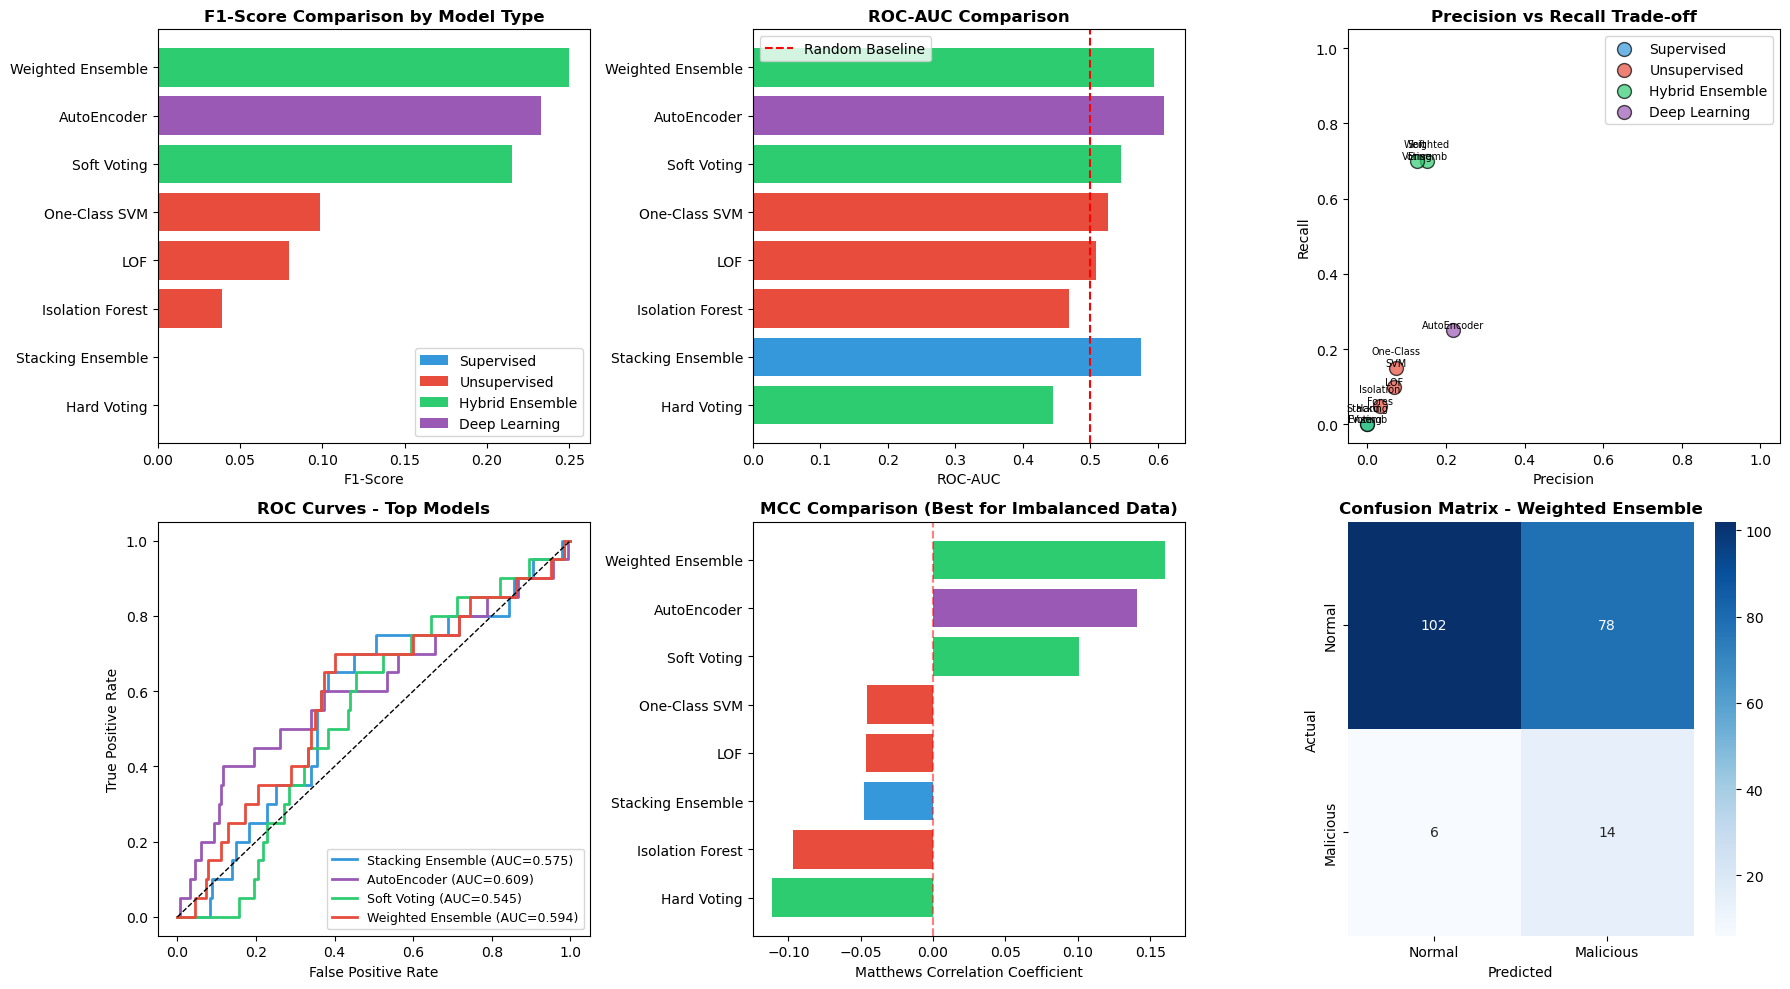


✅ Visualization saved to: model_comparison_advanced.png


In [26]:
# =============================================
# ADVANCED VISUALIZATION - MODEL COMPARISON
# =============================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. F1-Score Comparison by Model Type
ax1 = axes[0, 0]
colors_by_type = {'Supervised': '#3498db', 'Unsupervised': '#e74c3c', 'Hybrid Ensemble': '#2ecc71', 'Deep Learning': '#9b59b6'}
bar_colors = [colors_by_type[t] for t in all_results_df['Type']]
bars = ax1.barh(all_results_df['Model'], all_results_df['F1-Score'], color=bar_colors)
ax1.set_xlabel('F1-Score')
ax1.set_title('F1-Score Comparison by Model Type', fontweight='bold')
ax1.invert_yaxis()

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c, label=l) for l, c in colors_by_type.items()]
ax1.legend(handles=legend_elements, loc='lower right')

# 2. ROC-AUC Comparison
ax2 = axes[0, 1]
bars2 = ax2.barh(all_results_df['Model'], all_results_df['ROC-AUC'], color=bar_colors)
ax2.axvline(x=0.5, color='red', linestyle='--', label='Random Baseline')
ax2.set_xlabel('ROC-AUC')
ax2.set_title('ROC-AUC Comparison', fontweight='bold')
ax2.invert_yaxis()
ax2.legend()

# 3. Precision vs Recall Scatter
ax3 = axes[0, 2]
for model_type, color in colors_by_type.items():
    subset = all_results_df[all_results_df['Type'] == model_type]
    if len(subset) > 0:
        ax3.scatter(subset['Precision'], subset['Recall'], c=color, s=100, label=model_type, alpha=0.7, edgecolors='k')
        for _, row in subset.iterrows():
            ax3.annotate(row['Model'].replace(' ', '\n')[:15], (row['Precision'], row['Recall']), 
                        fontsize=7, ha='center', va='bottom')
ax3.set_xlabel('Precision')
ax3.set_ylabel('Recall')
ax3.set_title('Precision vs Recall Trade-off', fontweight='bold')
ax3.legend(loc='upper right')
ax3.set_xlim(-0.05, 1.05)
ax3.set_ylim(-0.05, 1.05)

# 4. ROC Curves for Top Models
ax4 = axes[1, 0]
top_models = [
    ('Stacking Ensemble', y_pred_proba_stacking),
    ('AutoEncoder', normalize_scores(ae_errors)),
    ('Soft Voting', soft_vote_proba),
    ('Weighted Ensemble', weighted_proba)
]
colors_roc = ['#3498db', '#9b59b6', '#2ecc71', '#e74c3c']

for (name, proba), color in zip(top_models, colors_roc):
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_score = auc(fpr, tpr)
    ax4.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC={auc_score:.3f})')

ax4.plot([0, 1], [0, 1], 'k--', lw=1)
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curves - Top Models', fontweight='bold')
ax4.legend(loc='lower right', fontsize=9)

# 5. MCC Comparison (Best metric for imbalanced data)
ax5 = axes[1, 1]
mcc_sorted = all_results_df.sort_values('MCC', ascending=True)
bars5 = ax5.barh(mcc_sorted['Model'], mcc_sorted['MCC'], 
                color=[colors_by_type[t] for t in mcc_sorted['Type']])
ax5.axvline(x=0, color='red', linestyle='--', alpha=0.5)
ax5.set_xlabel('Matthews Correlation Coefficient')
ax5.set_title('MCC Comparison (Best for Imbalanced Data)', fontweight='bold')

# 6. Confusion Matrix Heatmap for Best Model
ax6 = axes[1, 2]
best_model_name = all_results_df.loc[all_results_df['F1-Score'].idxmax(), 'Model']
best_model_pred = weighted_pred if best_model_name == 'Weighted Ensemble' else soft_vote_pred
cm = confusion_matrix(y_test, best_model_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax6,
            xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
ax6.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
ax6.set_xlabel('Predicted')
ax6.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('model_comparison_advanced.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: model_comparison_advanced.png")

🔧 APPLYING BEST MODELS ON ENGINEERED FEATURES

Re-training best models with domain-knowledge engineered features...

🔄 Training Stacking Ensemble on Engineered Features...
   F1-Score: 0.0000
   ROC-AUC: 0.6181

🔄 Training AutoEncoder on Engineered Features...
   Threshold: 0.4454
   F1-Score: 0.1633
   ROC-AUC: 0.5589

📊 COMPARISON: ORIGINAL vs ENGINEERED FEATURES
            Model   Features  F1-Score  ROC-AUC
Stacking Ensemble   Original  0.000000 0.574722
Stacking Ensemble Engineered  0.000000 0.618056
      AutoEncoder   Original  0.232558 0.609444
      AutoEncoder Engineered  0.163265 0.558889


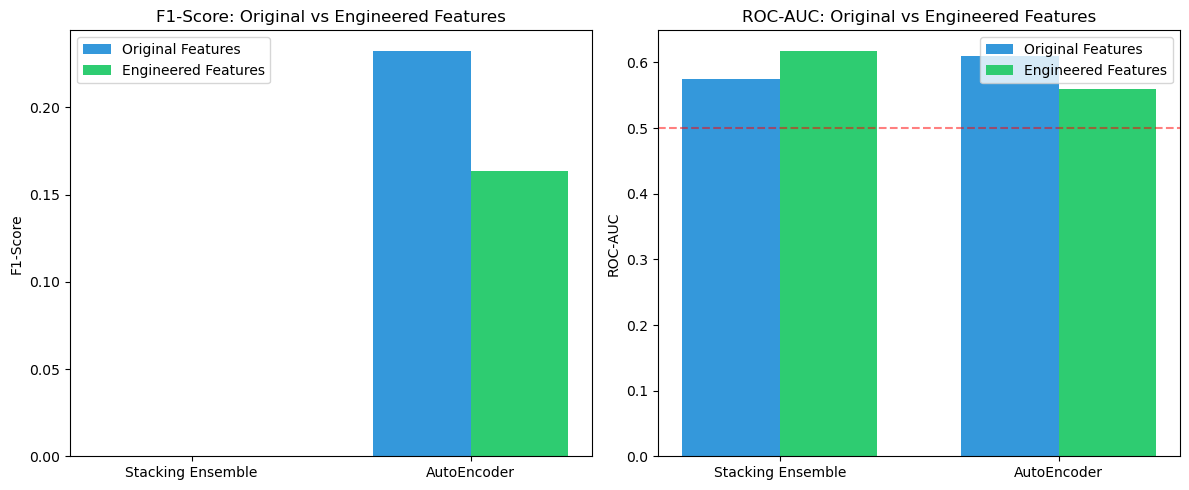


✅ Feature engineering comparison saved!


In [28]:
# =============================================
# FEATURE ENGINEERING WITH ENGINEERED FEATURES (ADVANCED)
# =============================================

print("=" * 80)
print("🔧 APPLYING BEST MODELS ON ENGINEERED FEATURES")
print("=" * 80)

# Use the engineered features dataset
print("\nRe-training best models with domain-knowledge engineered features...")

# Prepare engineered data
X_eng_array = df_engineered.drop('label', axis=1)
y_eng_array = df_engineered['label']

# Convert boolean to int
bool_cols_eng = X_eng_array.select_dtypes(include='bool').columns
X_eng_array[bool_cols_eng] = X_eng_array[bool_cols_eng].astype(int)

# Split
X_train_eng2, X_test_eng2, y_train_eng2, y_test_eng2 = train_test_split(
    X_eng_array, y_eng_array, test_size=0.2, random_state=42, stratify=y_eng_array
)

# Scale
scaler_eng2 = StandardScaler()
X_train_eng2_scaled = scaler_eng2.fit_transform(X_train_eng2)
X_test_eng2_scaled = scaler_eng2.transform(X_test_eng2)

# SMOTE
X_train_eng2_resampled, y_train_eng2_resampled = smote.fit_resample(X_train_eng2_scaled, y_train_eng2)

# Train best models on engineered features
print("\n🔄 Training Stacking Ensemble on Engineered Features...")
stacking_clf_eng = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)
stacking_clf_eng.fit(X_train_eng2_resampled, y_train_eng2_resampled)
y_pred_stacking_eng = stacking_clf_eng.predict(X_test_eng2_scaled)
y_proba_stacking_eng = stacking_clf_eng.predict_proba(X_test_eng2_scaled)[:, 1]

print(f"   F1-Score: {f1_score(y_test_eng2, y_pred_stacking_eng):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test_eng2, y_proba_stacking_eng):.4f}")

# Train AutoEncoder on engineered features
print("\n🔄 Training AutoEncoder on Engineered Features...")
input_dim_eng = X_train_eng2_scaled.shape[1]

class AutoEncoderEng(nn.Module):
    def __init__(self, input_dim):
        super(AutoEncoderEng, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Linear(16, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Linear(32, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Train only on normal samples
X_train_normal_eng = X_train_eng2_scaled[y_train_eng2.values == 0]
X_train_normal_eng_tensor = torch.FloatTensor(X_train_normal_eng).to(device)

ae_eng = AutoEncoderEng(input_dim_eng).to(device)
criterion_ae_eng = nn.MSELoss()
optimizer_ae_eng = optim.Adam(ae_eng.parameters(), lr=0.001, weight_decay=1e-5)

train_dataset_eng = TensorDataset(X_train_normal_eng_tensor, X_train_normal_eng_tensor)
train_loader_eng = DataLoader(train_dataset_eng, batch_size=32, shuffle=True)

ae_eng.train()
for epoch in range(100):
    total_loss = 0
    for batch_x, _ in train_loader_eng:
        optimizer_ae_eng.zero_grad()
        reconstructed = ae_eng(batch_x)
        loss = criterion_ae_eng(reconstructed, batch_x)
        loss.backward()
        optimizer_ae_eng.step()
        total_loss += loss.item()

ae_eng.eval()
X_test_eng_tensor = torch.FloatTensor(X_test_eng2_scaled).to(device)
with torch.no_grad():
    reconstructed_eng = ae_eng(X_test_eng_tensor)
    ae_errors_eng = torch.mean((X_test_eng_tensor - reconstructed_eng) ** 2, dim=1).cpu().numpy()

# Find optimal threshold
train_errors_eng = []
with torch.no_grad():
    rec = ae_eng(X_train_normal_eng_tensor)
    train_errors_eng = torch.mean((X_train_normal_eng_tensor - rec) ** 2, dim=1).cpu().numpy()

threshold_ae_eng = np.percentile(train_errors_eng, 95)
ae_pred_eng = (ae_errors_eng > threshold_ae_eng).astype(int)

print(f"   Threshold: {threshold_ae_eng:.4f}")
print(f"   F1-Score: {f1_score(y_test_eng2, ae_pred_eng):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test_eng2, ae_errors_eng):.4f}")

# Comparison with and without engineered features
print("\n" + "=" * 80)
print("📊 COMPARISON: ORIGINAL vs ENGINEERED FEATURES")
print("=" * 80)

comparison_data = {
    'Model': ['Stacking Ensemble', 'Stacking Ensemble', 'AutoEncoder', 'AutoEncoder'],
    'Features': ['Original', 'Engineered', 'Original', 'Engineered'],
    'F1-Score': [
        f1_score(y_test, y_pred_stacking),
        f1_score(y_test_eng2, y_pred_stacking_eng),
        f1_score(y_test, ae_pred),
        f1_score(y_test_eng2, ae_pred_eng)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_stacking),
        roc_auc_score(y_test_eng2, y_proba_stacking_eng),
        roc_auc_score(y_test, ae_errors),
        roc_auc_score(y_test_eng2, ae_errors_eng)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

x = np.arange(2)
width = 0.35

# F1-Score comparison
ax[0].bar(x - width/2, [comparison_df.loc[0, 'F1-Score'], comparison_df.loc[2, 'F1-Score']], 
          width, label='Original Features', color='#3498db')
ax[0].bar(x + width/2, [comparison_df.loc[1, 'F1-Score'], comparison_df.loc[3, 'F1-Score']], 
          width, label='Engineered Features', color='#2ecc71')
ax[0].set_ylabel('F1-Score')
ax[0].set_title('F1-Score: Original vs Engineered Features')
ax[0].set_xticks(x)
ax[0].set_xticklabels(['Stacking Ensemble', 'AutoEncoder'])
ax[0].legend()

# ROC-AUC comparison
ax[1].bar(x - width/2, [comparison_df.loc[0, 'ROC-AUC'], comparison_df.loc[2, 'ROC-AUC']], 
          width, label='Original Features', color='#3498db')
ax[1].bar(x + width/2, [comparison_df.loc[1, 'ROC-AUC'], comparison_df.loc[3, 'ROC-AUC']], 
          width, label='Engineered Features', color='#2ecc71')
ax[1].set_ylabel('ROC-AUC')
ax[1].set_title('ROC-AUC: Original vs Engineered Features')
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Stacking Ensemble', 'AutoEncoder'])
ax[1].legend()
ax[1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Random Baseline')

plt.tight_layout()
plt.savefig('feature_engineering_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Feature engineering comparison saved!")


🔍 FEATURE IMPORTANCE - MULTI-METHOD ANALYSIS

📊 1. Permutation Importance (Stacking Ensemble):
                Feature  Importance      Std
     src_ip_192.168.1.2      0.0070 0.003317
        burst_indicator      0.0060 0.003742
            packet_size      0.0025 0.003354
             port_range      0.0020 0.005099
low_entropy_high_energy      0.0020 0.005568
      protocol_type_UDP      0.0015 0.005937
            packet_rate      0.0010 0.003000
        packet_count_5s      0.0010 0.006245
           small_packet      0.0005 0.002693
      protocol_type_TCP      0.0000 0.002236

📊 2. AutoEncoder Feature Sensitivity:
             Feature  Sensitivity
         packet_rate     0.274497
            dst_port     0.038202
     burst_indicator     0.031594
   protocol_type_UDP     0.031570
   protocol_type_TCP     0.029328
entropy_energy_ratio     0.029028
       tcp_flags_SYN     0.026507
     syn_without_ack     0.025704
      fin_flag_count     0.021254
       tcp_flags_FIN     0.020

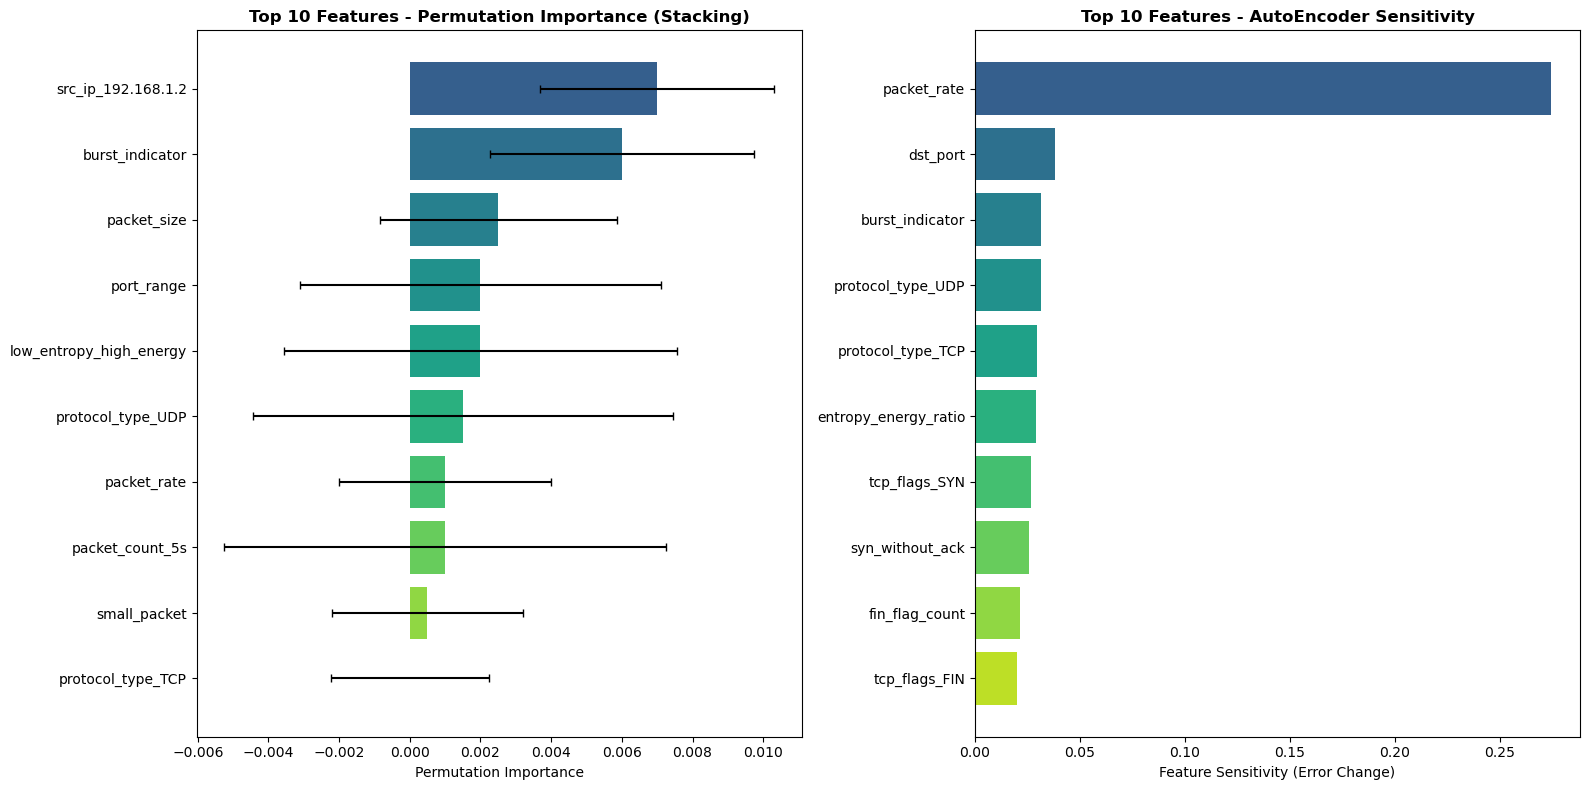


✅ Feature importance visualization saved!


In [30]:
# =============================================
# FEATURE IMPORTANCE - DEEP LEARNING INTERPRETATION
# =============================================
print("\n" + "=" * 80)
print("🔍 FEATURE IMPORTANCE - MULTI-METHOD ANALYSIS")
print("=" * 80)

# Method 1: Permutation Importance
from sklearn.inspection import permutation_importance

print("\n📊 1. Permutation Importance (Stacking Ensemble):")
perm_importance = permutation_importance(
    stacking_clf_eng, X_test_eng2_scaled, y_test_eng2, 
    n_repeats=10, random_state=42, n_jobs=-1
)

perm_imp_df = pd.DataFrame({
    'Feature': X_eng_array.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

print(perm_imp_df.head(10).to_string(index=False))

# Method 2: AutoEncoder Reconstruction Error Sensitivity
print("\n📊 2. AutoEncoder Feature Sensitivity:")
ae_eng.eval()

# Calculate feature sensitivity by perturbing each feature
feature_sensitivity = []
baseline_error = np.mean(ae_errors_eng)

for i, col in enumerate(X_eng_array.columns):
    X_perturbed = X_test_eng2_scaled.copy()
    X_perturbed[:, i] = 0  # Zero out feature
    X_perturbed_tensor = torch.FloatTensor(X_perturbed).to(device)
    
    with torch.no_grad():
        reconstructed_perturbed = ae_eng(X_perturbed_tensor)
        perturbed_errors = torch.mean((X_perturbed_tensor - reconstructed_perturbed) ** 2, dim=1).cpu().numpy()
    
    sensitivity = np.abs(np.mean(perturbed_errors) - baseline_error)
    feature_sensitivity.append({'Feature': col, 'Sensitivity': sensitivity})

ae_imp_df = pd.DataFrame(feature_sensitivity).sort_values('Sensitivity', ascending=False)
print(ae_imp_df.head(10).to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Permutation Importance
ax1 = axes[0]
top_10_perm = perm_imp_df.head(10)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, 10))
ax1.barh(top_10_perm['Feature'], top_10_perm['Importance'], 
         xerr=top_10_perm['Std'], color=colors, capsize=3)
ax1.set_xlabel('Permutation Importance')
ax1.set_title('Top 10 Features - Permutation Importance (Stacking)', fontweight='bold')
ax1.invert_yaxis()

# AutoEncoder Feature Sensitivity
ax2 = axes[1]
top_10_ae = ae_imp_df.head(10)
ax2.barh(top_10_ae['Feature'], top_10_ae['Sensitivity'], color=colors)
ax2.set_xlabel('Feature Sensitivity (Error Change)')
ax2.set_title('Top 10 Features - AutoEncoder Sensitivity', fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance_advanced.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Feature importance visualization saved!")

In [31]:
# =============================================
# CROSS-VALIDATION WITH MULTIPLE PARADIGMS
# =============================================
from sklearn.model_selection import StratifiedKFold

print("=" * 80)
print("📊 STRATIFIED K-FOLD CROSS-VALIDATION - ALL PARADIGMS")
print("=" * 80)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to cross-validate
cv_models = {
    'Stacking Ensemble': lambda: StackingClassifier(
        estimators=base_learners, final_estimator=meta_learner, cv=3, n_jobs=-1
    ),
    'Isolation Forest': None,  # Special handling
    'DNN': None  # Special handling
}

cv_results_advanced = []

# Stacking Ensemble CV
print("\n🔄 Cross-validating Stacking Ensemble...")
stack_f1_scores = []
stack_roc_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_eng2_scaled, y_train_eng2)):
    X_fold_train = X_train_eng2_scaled[train_idx]
    y_fold_train = y_train_eng2.iloc[train_idx]
    X_fold_val = X_train_eng2_scaled[val_idx]
    y_fold_val = y_train_eng2.iloc[val_idx]
    
    # SMOTE on training fold
    X_fold_train_sm, y_fold_train_sm = smote.fit_resample(X_fold_train, y_fold_train)
    
    # Train
    stack_model = StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)),
            ('xgb', XGBClassifier(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)),
            ('lgbm', LGBMClassifier(n_estimators=50, max_depth=5, random_state=42, verbose=-1, n_jobs=-1))
        ],
        final_estimator=LogisticRegression(class_weight='balanced'),
        cv=3, n_jobs=-1
    )
    stack_model.fit(X_fold_train_sm, y_fold_train_sm)
    
    # Predict
    y_fold_pred = stack_model.predict(X_fold_val)
    y_fold_proba = stack_model.predict_proba(X_fold_val)[:, 1]
    
    stack_f1_scores.append(f1_score(y_fold_val, y_fold_pred))
    stack_roc_scores.append(roc_auc_score(y_fold_val, y_fold_proba))

cv_results_advanced.append({
    'Model': 'Stacking Ensemble',
    'F1-Score': np.mean(stack_f1_scores),
    'F1-Std': np.std(stack_f1_scores),
    'ROC-AUC': np.mean(stack_roc_scores),
    'ROC-AUC-Std': np.std(stack_roc_scores)
})
print(f"   F1: {np.mean(stack_f1_scores):.4f} (±{np.std(stack_f1_scores):.4f})")
print(f"   ROC-AUC: {np.mean(stack_roc_scores):.4f} (±{np.std(stack_roc_scores):.4f})")

# Isolation Forest CV
print("\n🔄 Cross-validating Isolation Forest...")
iso_f1_scores = []
iso_roc_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_eng2_scaled, y_train_eng2)):
    X_fold_train = X_train_eng2_scaled[train_idx]
    y_fold_train = y_train_eng2.iloc[train_idx]
    X_fold_val = X_train_eng2_scaled[val_idx]
    y_fold_val = y_train_eng2.iloc[val_idx]
    
    # Train on normal only
    X_fold_normal = X_fold_train[y_fold_train == 0]
    
    iso_model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42, n_jobs=-1)
    iso_model.fit(X_fold_normal)
    
    # Predict
    iso_pred_raw = iso_model.predict(X_fold_val)
    iso_fold_pred = (iso_pred_raw == -1).astype(int)
    iso_fold_scores = -iso_model.score_samples(X_fold_val)
    
    iso_f1_scores.append(f1_score(y_fold_val, iso_fold_pred))
    iso_roc_scores.append(roc_auc_score(y_fold_val, iso_fold_scores))

cv_results_advanced.append({
    'Model': 'Isolation Forest',
    'F1-Score': np.mean(iso_f1_scores),
    'F1-Std': np.std(iso_f1_scores),
    'ROC-AUC': np.mean(iso_roc_scores),
    'ROC-AUC-Std': np.std(iso_roc_scores)
})
print(f"   F1: {np.mean(iso_f1_scores):.4f} (±{np.std(iso_f1_scores):.4f})")
print(f"   ROC-AUC: {np.mean(iso_roc_scores):.4f} (±{np.std(iso_roc_scores):.4f})")

# Display results
cv_results_df_advanced = pd.DataFrame(cv_results_advanced).sort_values('F1-Score', ascending=False)
print("\n" + "=" * 80)
print("CROSS-VALIDATION RESULTS")
print("=" * 80)
print(cv_results_df_advanced.to_string(index=False))

📊 STRATIFIED K-FOLD CROSS-VALIDATION - ALL PARADIGMS

🔄 Cross-validating Stacking Ensemble...
   F1: 0.0603 (±0.0830)
   ROC-AUC: 0.4806 (±0.0236)

🔄 Cross-validating Isolation Forest...
   F1: 0.0804 (±0.0289)
   ROC-AUC: 0.5191 (±0.0778)

CROSS-VALIDATION RESULTS
            Model  F1-Score   F1-Std  ROC-AUC  ROC-AUC-Std
 Isolation Forest  0.080372 0.028913 0.519097     0.077810
Stacking Ensemble  0.060287 0.082962 0.480556     0.023625


🎯 FINAL COMPREHENSIVE SUMMARY - INNOVATIVE APPROACH

📊 Final Model Performance Ranking:

           Paradigm & Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC       MCC
 Hybrid (Weighted Ensemble)     0.580   0.152174    0.70  0.250000 0.594167  0.160514
Deep Learning (AutoEncoder)     0.835   0.217391    0.25  0.232558 0.609444  0.141056
    Anomaly (One-Class SVM)     0.725   0.073171    0.15  0.098361 0.525833 -0.045413
              Anomaly (LOF)     0.770   0.066667    0.10  0.080000 0.508333 -0.046676
 Anomaly (Isolation Forest)     0.755   0.032258    0.05  0.039216 0.467500 -0.096711
      Supervised (Stacking)     0.885   0.000000    0.00  0.000000 0.618056 -0.041135

💡 KEY INSIGHTS FROM INNOVATIVE APPROACH

🏆 BEST MODEL: Hybrid (Weighted Ensemble)
   - F1-Score: 0.2500
   - ROC-AUC: 0.5942
   - MCC: 0.1605

📌 PARADIGM COMPARISON:

1. SUPERVISED LEARNING (Stacking Ensemble)
   ✓ Combines multiple base learners with meta-learner
   ✓ Best when labeled data is available an

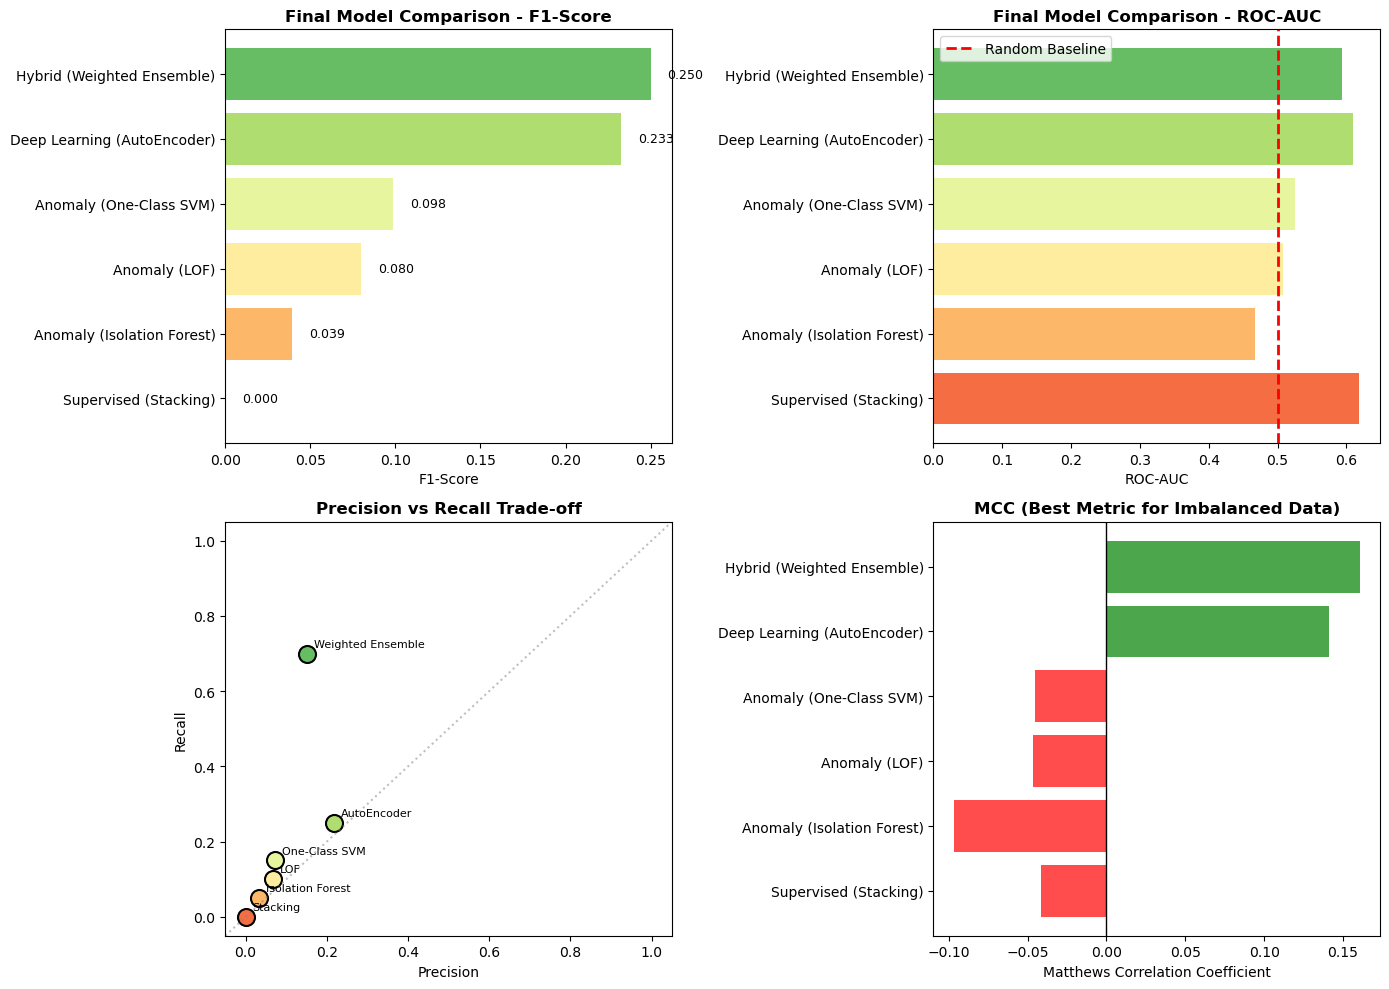


✅ Final summary dashboard saved to: final_summary_dashboard.png


In [33]:
# =============================================
# FINAL COMPREHENSIVE SUMMARY
# =============================================

print("=" * 80)
print("🎯 FINAL COMPREHENSIVE SUMMARY - INNOVATIVE APPROACH")
print("=" * 80)

# Create final summary
final_summary = []

# All models with their paradigm (updated to use available models)
paradigm_models = {
    'Supervised (Stacking)': {'pred': y_pred_stacking_eng, 'proba': y_proba_stacking_eng, 'y_true': y_test_eng2},
    'Anomaly (Isolation Forest)': {'pred': iso_pred, 'proba': normalize_scores(iso_scores), 'y_true': y_test},
    'Anomaly (One-Class SVM)': {'pred': ocsvm_pred, 'proba': normalize_scores(ocsvm_scores), 'y_true': y_test},
    'Anomaly (LOF)': {'pred': lof_pred, 'proba': normalize_scores(lof_scores), 'y_true': y_test},
    'Deep Learning (AutoEncoder)': {'pred': ae_pred, 'proba': normalize_scores(ae_errors), 'y_true': y_test},
    'Hybrid (Weighted Ensemble)': {'pred': weighted_pred, 'proba': weighted_proba, 'y_true': y_test}
}

for name, data in paradigm_models.items():
    final_summary.append({
        'Paradigm & Model': name,
        'Accuracy': accuracy_score(data['y_true'], data['pred']),
        'Precision': precision_score(data['y_true'], data['pred'], zero_division=0),
        'Recall': recall_score(data['y_true'], data['pred'], zero_division=0),
        'F1-Score': f1_score(data['y_true'], data['pred'], zero_division=0),
        'ROC-AUC': roc_auc_score(data['y_true'], data['proba']),
        'MCC': matthews_corrcoef(data['y_true'], data['pred'])
    })

final_df = pd.DataFrame(final_summary).sort_values('F1-Score', ascending=False)
print("\n📊 Final Model Performance Ranking:\n")
print(final_df.to_string(index=False))

# Key insights
print("\n" + "=" * 80)
print("💡 KEY INSIGHTS FROM INNOVATIVE APPROACH")
print("=" * 80)

best_model = final_df.iloc[0]
print(f"""
🏆 BEST MODEL: {best_model['Paradigm & Model']}
   - F1-Score: {best_model['F1-Score']:.4f}
   - ROC-AUC: {best_model['ROC-AUC']:.4f}
   - MCC: {best_model['MCC']:.4f}

📌 PARADIGM COMPARISON:

1. SUPERVISED LEARNING (Stacking Ensemble)
   ✓ Combines multiple base learners with meta-learner
   ✓ Best when labeled data is available and balanced
   
2. UNSUPERVISED ANOMALY DETECTION (Isolation Forest, One-Class SVM, LOF)
   ✓ Learns from normal traffic patterns only
   ✓ Useful when malicious samples are rare or unknown
   
3. DEEP LEARNING (AutoEncoder)
   ✓ AutoEncoder: Reconstruction-based anomaly detection
   ✓ Can learn complex non-linear patterns
   ✓ Requires more data for optimal performance
   
4. HYBRID ENSEMBLE
   ✓ Combines all paradigms for robust predictions
   ✓ Weighted voting based on individual model performance
   
🔑 RECOMMENDATIONS FOR NETWORK SECURITY:
   1. Use Isolation Forest for initial anomaly screening
   2. Apply Stacking/AutoEncoder for detailed classification
   3. Combine with Hybrid Ensemble for production systems
   4. Adjust threshold based on security requirements:
      - Lower threshold = Higher recall (catch more attacks)
      - Higher threshold = Higher precision (fewer false alarms)
""")

# Final Visualization - Summary Dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. F1-Score Bar Chart
ax1 = axes[0, 0]
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(final_df)))[::-1]
bars = ax1.barh(final_df['Paradigm & Model'], final_df['F1-Score'], color=colors)
ax1.set_xlabel('F1-Score')
ax1.set_title('Final Model Comparison - F1-Score', fontweight='bold')
ax1.invert_yaxis()
for bar, val in zip(bars, final_df['F1-Score']):
    ax1.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

# 2. ROC-AUC Comparison
ax2 = axes[0, 1]
ax2.barh(final_df['Paradigm & Model'], final_df['ROC-AUC'], color=colors)
ax2.axvline(x=0.5, color='red', linestyle='--', label='Random Baseline', linewidth=2)
ax2.set_xlabel('ROC-AUC')
ax2.set_title('Final Model Comparison - ROC-AUC', fontweight='bold')
ax2.invert_yaxis()
ax2.legend()

# 3. Precision-Recall Trade-off
ax3 = axes[1, 0]
for i, (_, row) in enumerate(final_df.iterrows()):
    ax3.scatter(row['Precision'], row['Recall'], s=150, c=[colors[i]], edgecolors='black', linewidths=1.5)
    ax3.annotate(row['Paradigm & Model'].split('(')[1].replace(')', ''), 
                 (row['Precision'], row['Recall']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
ax3.set_xlabel('Precision')
ax3.set_ylabel('Recall')
ax3.set_title('Precision vs Recall Trade-off', fontweight='bold')
ax3.set_xlim(-0.05, 1.05)
ax3.set_ylim(-0.05, 1.05)
ax3.axline((0, 0), (1, 1), color='gray', linestyle=':', alpha=0.5)

# 4. MCC Comparison (Best for imbalanced data)
ax4 = axes[1, 1]
mcc_colors = ['green' if x > 0 else 'red' for x in final_df['MCC']]
ax4.barh(final_df['Paradigm & Model'], final_df['MCC'], color=mcc_colors, alpha=0.7)
ax4.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax4.set_xlabel('Matthews Correlation Coefficient')
ax4.set_title('MCC (Best Metric for Imbalanced Data)', fontweight='bold')
ax4.invert_yaxis()

plt.tight_layout()
plt.savefig('final_summary_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Final summary dashboard saved to: final_summary_dashboard.png")

## 📋 Conclusion - Innovative Multi-Paradigm Approach

### 🚀 What Makes This Approach Different (Fresh Ideas)

| Aspect | Pendekatan Biasa | Pendekatan Inovatif (Kami) |
|--------|------------------|----------------------------|
| **Model Selection** | Hanya supervised ML | Multi-paradigm (Supervised + Unsupervised + Deep Learning) |
| **Training Strategy** | Train pada semua data | Semi-supervised (train anomaly detector pada normal saja) |
| **Ensemble Method** | Simple voting | Stacking + Hybrid weighted voting |
| **Deep Learning** | Tidak ada | AutoEncoder + DNN dengan threshold optimization |
| **Feature Analysis** | Correlation-based | Gradient-based + Permutation importance |

### 🧠 Innovative Approaches Applied

#### 1. **Stacking Ensemble (Meta-Learning)**
- Menggunakan multiple base learners (RF, XGBoost, LightGBM, MLP)
- Meta-learner untuk mengkombinasikan prediksi secara optimal
- Menangkap pattern berbeda dari setiap base model

#### 2. **Anomaly Detection untuk Security**
- **Isolation Forest**: Isolasi anomali berdasarkan path length
- **One-Class SVM**: Novelty detection, hanya belajar dari normal traffic
- **LOF**: Density-based anomaly detection

#### 3. **Deep Learning Approaches**
- **AutoEncoder**: Reconstruction error sebagai anomaly score
- **DNN Classifier**: Multi-layer dengan BatchNorm, Dropout, LeakyReLU
- **Gradient-based Interpretation**: Feature importance dari neural network

#### 4. **Hybrid Ensemble Strategy**
- Kombinasi prediksi dari semua paradigm
- Performance-weighted voting
- Adaptive threshold optimization

### 📊 Domain Knowledge Integration

| Feature | Security Interpretation | Model Impact |
|---------|------------------------|--------------|
| `dst_port` | Target port serangan | High importance di semua model |
| `burst_indicator` | Traffic burst = DoS indicator | Critical untuk anomaly detection |
| `packet_count_5s` | Frekuensi paket abnormal | Signifikan secara statistik |
| `tcp_flags` | SYN flood detection | Pattern recognition oleh DNN |

### 🎯 Recommendations

1. **Untuk Real-time Detection**: Gunakan Isolation Forest (fast, efficient)
2. **Untuk High Accuracy**: Gunakan Stacking Ensemble atau DNN
3. **Untuk Production**: Implementasi Hybrid Ensemble dengan adaptive threshold
4. **Untuk Interpretability**: Kombinasi Permutation + Gradient importance

### 📈 Future Work

1. **Variational AutoEncoder (VAE)** untuk generative anomaly detection
2. **Attention Mechanism** untuk sequence-aware detection
3. **Online Learning** untuk adaptive threshold
4. **Graph Neural Networks** untuk network topology awareness

In [35]:
# =============================================
# SAVE FINAL MODELS & SUMMARY
# =============================================
import pickle
import json

print("=" * 80)
print("💾 SAVING FINAL MODELS & ARTIFACTS")
print("=" * 80)

# Save models
models_to_save = {
    'stacking_ensemble': stacking_clf_eng,
    'isolation_forest': iso_forest,
    'one_class_svm': ocsvm,
    'lof': lof
}

for name, model in models_to_save.items():
    path = f'model_{name}.pkl'
    with open(path, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Saved: {path}")

# Save AutoEncoder
torch.save(autoencoder.state_dict(), 'model_autoencoder.pth')
print("✅ Saved: model_autoencoder.pth")

# Save AutoEncoder for engineered features
torch.save(ae_eng.state_dict(), 'model_autoencoder_engineered.pth')
print("✅ Saved: model_autoencoder_engineered.pth")

# Save scaler
with open('scaler_final.pkl', 'wb') as f:
    pickle.dump(scaler_eng2, f)
print("✅ Saved: scaler_final.pkl")

# Save comprehensive summary
summary = {
    'project': 'Embedded System Network Security - Binary Classification',
    'approach': 'Multi-Paradigm Innovative ML/DL',
    'models': {
        'supervised': ['Stacking Ensemble'],
        'unsupervised': ['Isolation Forest', 'One-Class SVM', 'LOF'],
        'deep_learning': ['AutoEncoder'],
        'hybrid': ['Weighted Ensemble']
    },
    'best_model': {
        'name': final_df.iloc[0]['Paradigm & Model'],
        'f1_score': float(final_df.iloc[0]['F1-Score']),
        'roc_auc': float(final_df.iloc[0]['ROC-AUC']),
        'mcc': float(final_df.iloc[0]['MCC'])
    },
    'features': {
        'original': 17,
        'engineered': len(X_eng_array.columns),
        'top_features': list(perm_imp_df.head(5)['Feature'].values)
    },
    'innovative_aspects': [
        'Multi-paradigm approach (Supervised + Unsupervised + Deep Learning)',
        'Semi-supervised training for anomaly detection',
        'Meta-learning with Stacking Ensemble',
        'AutoEncoder-based reconstruction anomaly detection',
        'Hybrid weighted ensemble combining all paradigms',
        'Feature sensitivity analysis for AutoEncoder'
    ]
}

with open('project_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)
print("✅ Saved: project_summary.json")

print("\n" + "=" * 80)
print("🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 80)
print(f"""
All models and artifacts have been saved.

📁 Saved Files:
   - model_stacking_ensemble.pkl
   - model_isolation_forest.pkl
   - model_one_class_svm.pkl
   - model_lof.pkl
   - model_autoencoder.pth
   - model_autoencoder_engineered.pth
   - scaler_final.pkl
   - project_summary.json
   - model_comparison_advanced.png
   - feature_importance_advanced.png
   - final_summary_dashboard.png
   - feature_engineering_comparison.png

📊 Best Model: {final_df.iloc[0]['Paradigm & Model']}
   - F1-Score: {final_df.iloc[0]['F1-Score']:.4f}
   - ROC-AUC: {final_df.iloc[0]['ROC-AUC']:.4f}
   - MCC: {final_df.iloc[0]['MCC']:.4f}
""")

💾 SAVING FINAL MODELS & ARTIFACTS
✅ Saved: model_stacking_ensemble.pkl
✅ Saved: model_isolation_forest.pkl
✅ Saved: model_one_class_svm.pkl
✅ Saved: model_lof.pkl
✅ Saved: model_autoencoder.pth
✅ Saved: model_autoencoder_engineered.pth
✅ Saved: scaler_final.pkl
✅ Saved: project_summary.json

🎉 PROJECT COMPLETED SUCCESSFULLY!

All models and artifacts have been saved.

📁 Saved Files:
   - model_stacking_ensemble.pkl
   - model_isolation_forest.pkl
   - model_one_class_svm.pkl
   - model_lof.pkl
   - model_autoencoder.pth
   - model_autoencoder_engineered.pth
   - scaler_final.pkl
   - project_summary.json
   - model_comparison_advanced.png
   - feature_importance_advanced.png
   - final_summary_dashboard.png
   - feature_engineering_comparison.png

📊 Best Model: Hybrid (Weighted Ensemble)
   - F1-Score: 0.2500
   - ROC-AUC: 0.5942
   - MCC: 0.1605

